<a href="https://colab.research.google.com/github/mauipom11/Data-go/blob/main/Work_book_Rest_pass_or_fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Dataset ↙

In [ ]:
!wget https://raw.githubusercontent.com/prasys/QRC_Datasets/8fcfdb87203259f918e55a7b9fa7dcf9a68c9b40/ResData.csv

#Import Packages 🚢

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


# Intro ⚛
##Our aim is to predict if a restaurant will pass thier health inspection
The data comes from the New York

# -(STEP 1)-
##Initialise workshop 🦺
1. 📦import pandas🐼 as pd
2. read_csv the file we're interested in
3. Show the dataframe

In [ ]:
import pandas as pd
df = pd.read_csv('ResData.csv')
df.head(3)

,ID,Date,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,City ID,State ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,0,7/8/2017,35576,27170,25928,RESTAURANT,14291,id-11235901,id_1890134,81874.0,COMPLAINT,3.0,High,locid3070,1
1,1,28-06-2016,33490,9159,8683,BAKERY,15266,id-11235901,id_1890134,81876.0,CANVASS,18.0,High,locid16348,1
2,2,6/7/2014,1716,12151,11559,RESTAURANT,10113,id-11235901,id_1890134,81886.0,CANVASS,32.0,High,locid13425,4


# -(STEP 2)-
##Build our functions and tools 🔨
1. We need a list of identifying features that we can focus on when ever we look at the data.
2. We need a way to look at what needs to be changed or dropped

## Quick tip ⚓
To choose your columns its easier to copy and paste them from the df.columns

In [ ]:
list_of_columns = ['ID', 'Restaurent Type', 'Risk_level', 'Geographical_Location', 'Assessment_Results']

##Functions 🧰🔧

##value_correlation(df, col1, col2) 💰✔
Used for checking the correlation between two values in

In [ ]:
def value_correlation(df, col1, col2):
    # Drop missing values in the selected columns
    filtered_df = df[[col1, col2]].dropna()
    if filtered_df.shape[0] < 2:  # Need at least two rows for correlation
        print("Not enough data to calculate correlation.")
        return None
    return filtered_df[col1].corr(filtered_df[col2])  # Pearson correlation


##date_time_converter(df, column_name) ⏲

In [ ]:
def date_time_converter(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce', dayfirst=True)  # Auto-detect format
    df[column_name] = df[column_name].map(lambda x: x.toordinal() if pd.notnull(x) else None)  # Convert to ordinal date
    return df

##true_false_maker(df, column)
###Used for converting 't' and 'f' to boolean values

In [ ]:
def true_false_maker(df, column):
  df[column] = df[column].replace({'f': False, 't': True})
  return df


##basic_label_encode(df, column_name) 📪

In [ ]:
from sklearn.preprocessing import LabelEncoder

def basic_label_encode(df, column_name):
    label_encoder = LabelEncoder()
    df[column_name] = label_encoder.fit_transform(df[column_name])
    return df


###loop_label_encode(df, list_of_columns)

In [ ]:
def loop_label_encode(df, list_of_columns):
  for column in list_of_columns:
    df = basic_label_encode(df, column)
  return df

## cookie_finder(df, column, contains) 🍪
### Used to delete anything that doesnt contain your word ⏮

In [ ]:
def cookie_finder(df, column, contains):
  reg_info = df[df[column].str.contains(contains, case=False, na=False)]
  return reg_info

##cookie_invert(df, column, contains) 🍪
###Used when you need to delete a word from your dataframe ⏪


In [ ]:
def cookie_invert(df, column, contains):
    # Invert the condition to select rows where the column does NOT contain the keyword
    reg_info = df[~df[column].str.contains(contains, case=False, na=False)]
    return reg_info

##nuls_under(df, limit_for_nans) 🔢
###Used when you need to know which columns have more null values than the number you give it
*This function needs to reference a dataframe*

In [ ]:
def nuls_under(df, limit_for_nans):
    nan_counts = df.isna().sum()
    columns_with_nan = nan_counts[nan_counts > limit_for_nans]
    return columns_with_nan

##lone_wolf_droppa(df, 'room_type', 'Hotel room') 🐺
###Used for dropping values that are a minority and dont confom to the data



In [ ]:
def lone_wolf_droppa(df, column, value):
  df = df[df[column] != value]
  return df

##correlation_matrix ⛓


In [ ]:
def correlation_matrix(df):
  numeric_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  correlation_matrix = df[numeric_columns].corr()
  return correlation_matrix

##Training AI 💻

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_logistic_regression_multi(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train logistic regression model (for multiclass classification)
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics for multiclass
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'confusion_matrix': cm
    }


##Data Frame from X_test ⚗
1. Make a dataframe with X_test and the wrong predictions

In [ ]:
def misclassified_data(X, y):
  # Splitting the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y)

  # Training the model
  model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
  model.fit(X_train, y_train)

  # Making predictions
  y_pred = model.predict(X_test)

  # Creating a DataFrame to store results
  df_results = X_test.copy()
  df_results["true_label"] = y_test.values
  df_results["predicted_label"] = y_pred

  # Filtering for misclassifications where 1 was predicted instead of 4 or vice versa
  df_misclassified = df_results[
      # ((df_results["true_label"] == 1) & (df_results["predicted_label"] == 4))
      ((df_results["true_label"] == 1) & (df_results["predicted_label"] == 1))
  ]

  return df_misclassified



In [ ]:
def mis_count_graph(df_misclassified):
  # Count plot of misclassified labels
  plt.figure(figsize=(6, 4))
  sns.countplot(x=df_misclassified["true_label"], hue=df_misclassified["predicted_label"], palette="coolwarm")

  plt.xlabel("True Label")
  plt.ylabel("Count")
  plt.title("Misclassified Predictions (1 ↔ 4)")
  plt.legend(title="Predicted Label")
  plt.show()


# -(STEP 3)-
##Start converting features to numbers ❎

In [ ]:
encodables = ['Restaurent Type', 'Reason', 'Restaurent Type', 'Risk_level']

In [ ]:
date_time_converter(df, 'Date').head(1)

,ID,Date,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,City ID,State ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,0,736548.0,35576,27170,25928,RESTAURANT,14291,id-11235901,id_1890134,81874.0,COMPLAINT,3.0,High,locid3070,1


In [ ]:
loop_label_encode(df, encodables).head(1)

,ID,Date,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,City ID,State ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,0,736548.0,35576,27170,25928,312,14291,id-11235901,id_1890134,81874.0,2,3.0,0,locid3070,1


In [ ]:
correlation_matrix(df)

,ID,Date,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,LocationID,Reason,SectionViolations,Risk_level,Assessment_Results
ID,1.000000,0.009523,0.006051,-0.001930,-0.003607,-0.007316,-0.004890,-0.001345,-0.002359,0.000204,0.000033,0.005000
Date,0.009523,1.000000,0.248086,0.002605,0.000745,-0.003839,-0.009378,0.009806,-0.116447,-0.140347,-0.081339,0.031872
LicenseNo,0.006051,0.248086,1.000000,0.007364,0.003537,0.031205,-0.006817,-0.002721,0.068404,-0.032157,-0.043294,-0.029780
Assessment_ID,-0.001930,0.002605,0.007364,1.000000,0.916284,0.056573,-0.018200,0.002312,-0.011928,0.004203,-0.064691,-0.000393
Assessment_Name,-0.003607,0.000745,0.003537,0.916284,1.000000,0.047126,-0.012547,0.003379,-0.007326,0.003849,-0.060602,-0.000549
Restaurent Type,-0.007316,-0.003839,0.031205,0.056573,0.047126,1.000000,-0.032001,-0.009189,-0.122868,-0.003321,-0.126823,0.041391
Street ID,-0.004890,-0.009378,-0.006817,-0.018200,-0.012547,-0.032001,1.000000,0.013182,0.005443,0.003841,0.005445,-0.006249
LocationID,-0.001345,0.009806,-0.002721,0.002312,0.003379,-0.009189,0.013182,1.000000,-0.006599,0.007543,-0.001110,-0.004832
Reason,-0.002359,-0.116447,0.068404,-0.011928,-0.007326,-0.122868,0.005443,-0.006599,1.000000,-0.028953,0.128165,-0.099777
SectionViolations,0.000204,-0.140347,-0.032157,0.004203,0.003849,-0.003321,0.003841,0.007543,-0.028953,1.000000,0.006531,0.401554


In [ ]:
model_data = df[['ID','Date', 'Restaurent Type', 'SectionViolations','Risk_level', 'Assessment_Results']].copy()
model_data = model_data.dropna()
correlation_matrix(model_data)

,ID,Date,Restaurent Type,SectionViolations,Risk_level,Assessment_Results
ID,1.000000,0.009219,-0.001392,0.001614,0.005018,0.011086
Date,0.009219,1.000000,0.001657,-0.140347,-0.073499,0.039400
Restaurent Type,-0.001392,0.001657,1.000000,-0.001573,-0.148793,0.037906
SectionViolations,0.001614,-0.140347,-0.001573,1.000000,0.006968,0.410999
Risk_level,0.005018,-0.073499,-0.148793,0.006968,1.000000,-0.042626
Assessment_Results,0.011086,0.039400,0.037906,0.410999,-0.042626,1.000000


In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 117488
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  34856 non-null  int64  
 1   Date                34856 non-null  float64
 2   Restaurent Type     34856 non-null  int64  
 3   SectionViolations   34856 non-null  float64
 4   Risk_level          34856 non-null  int64  
 5   Assessment_Results  34856 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.9 MB


##Merge the labels into 2 categories, pass or fail ⚖

In [ ]:
def drop_value(df, column, value):
    return df[df[column] != value]

In [ ]:
model_data['Assessment_Results'] = model_data['Assessment_Results'].replace({6: 1, 2: 1, 5: 1})
model_data = drop_value(model_data, 'Assessment_Results', 0)
model_data = drop_value(model_data, 'Assessment_Results', 3)


#-(STEP 4)-
##Train the AI with your data 🖥

#Sample and refine model 🍮
---
1. We evened out the target answers to minimize bias


In [ ]:
import pandas as pd

# Assuming df is your dataframe and 'class_column' is the name of the column with class labels
class_column = 'Assessment_Results'  # Replace this with the actual column name

# Get the count of class 1
min_count = model_data[model_data[class_column] == 1].shape[0]

# Sample class 4 to match class 1
model_data_class_4_sampled = model_data[model_data[class_column] == 4].sample(min_count, random_state=42)

# Keep all of class 1 and add the sampled class 4
model_data_sampled = pd.concat([model_data[model_data[class_column] == 1], model_data_class_4_sampled])

# Shuffle the dataset
model_data_sampled = model_data_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(model_data_sampled[class_column].value_counts())
y = model_data_sampled['Assessment_Results']
X = model_data_sampled.drop('Assessment_Results', axis=1)


Assessment_Results
1    12299
4    12299
Name: count, dtype: int64


<ipython-input-358-68122ea7c8ae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=model_data_sampled['Assessment_Results'], palette="Blues")


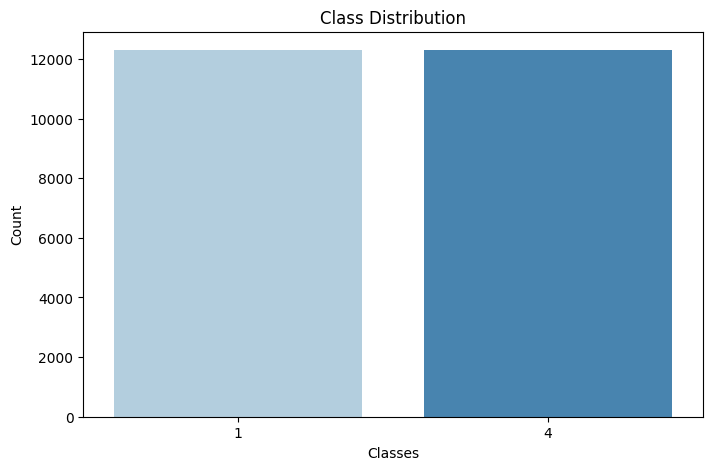

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y is your target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=model_data_sampled['Assessment_Results'], palette="Blues")

plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


#AI results 🤖

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


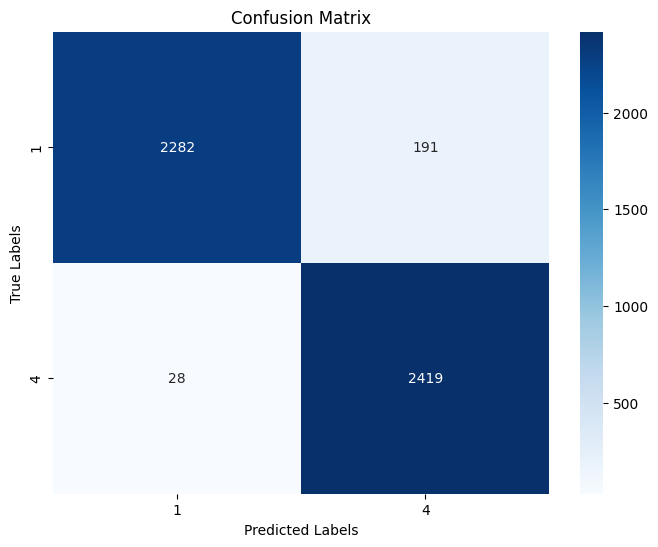

{'accuracy': 0.9554878048780487,
 'precision': 0.9575106900233058,
 'recall': 0.9554878048780487,
 'f1': 0.9554467094177589,
 'confusion_matrix': array([[2282,  191],
        [  28, 2419]])}

In [ ]:
train_logistic_regression_multi(X, y)

#Data Frame look book 📘👀

##Missing Values 🔢

In [ ]:
df.isna().sum()

##Date Frame OverView 👁

In [ ]:
df.head(1)

,ID,Date,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,City ID,State ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,0,736548.0,35576,27170,25928,312,14291,id-11235901,id_1890134,81874.0,2,3.0,0,locid3070,1


In [ ]:
df.columns

Index(['ID', 'Date', 'LicenseNo', 'Assessment_ID', 'Assessment_Name',
       'Restaurent Type', 'Street ID', 'City ID ', 'State ID', 'LocationID',
       'Reason', 'SectionViolations', 'Risk_level', 'Geographical_Location',
       'Assessment_Results'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117491 entries, 0 to 117490
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     117491 non-null  int64  
 1   Date                   45124 non-null   float64
 2   LicenseNo              117491 non-null  int64  
 3   Assessment_ID          117491 non-null  int64  
 4   Assessment_Name        117491 non-null  int64  
 5   Restaurent Type        117491 non-null  int64  
 6   Street ID              117491 non-null  int64  
 7   City ID                117491 non-null  object 
 8   State ID               117491 non-null  object 
 9   LocationID             117469 non-null  float64
 10  Reason                 117491 non-null  int64  
 11  SectionViolations      90615 non-null   float64
 12  Risk_level             117491 non-null  int64  
 13  Geographical_Location  117491 non-null  object 
 14  Assessment_Results     117491 non-nu

In [ ]:
df = df

In [ ]:
list_of_columns = list_of_columns + ['SectionViolations']

In [ ]:
df[list_of_columns]

,ID,Restaurent Type,Risk_level,Geographical_Location,Assessment_Results,SectionViolations
0,0,312,0,locid3070,1,3.0
1,1,25,0,locid16348,1,18.0
2,2,312,0,locid13425,4,32.0
3,3,312,0,locid656,1,18.0
4,4,312,0,locid12104,4,34.0
...,...,...,...,...,...,...
117486,117486,312,0,locid4241,4,32.0
117487,117487,255,2,locid6424,4,NaN
117488,117488,334,0,locid1341,1,26.0
117489,117489,312,0,locid3619,4,33.0


##Correlation Stats ⛳

In [ ]:
correlation_matrix(df)

,ID,Date,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,LocationID,Reason,SectionViolations,Risk_level,Assessment_Results
ID,1.000000,0.009523,0.006051,-0.001930,-0.003607,-0.007316,-0.004890,-0.001345,-0.002359,0.000204,0.000033,0.005000
Date,0.009523,1.000000,0.248086,0.002605,0.000745,-0.003839,-0.009378,0.009806,-0.116447,-0.140347,-0.081339,0.031872
LicenseNo,0.006051,0.248086,1.000000,0.007364,0.003537,0.031205,-0.006817,-0.002721,0.068404,-0.032157,-0.043294,-0.029780
Assessment_ID,-0.001930,0.002605,0.007364,1.000000,0.916284,0.056573,-0.018200,0.002312,-0.011928,0.004203,-0.064691,-0.000393
Assessment_Name,-0.003607,0.000745,0.003537,0.916284,1.000000,0.047126,-0.012547,0.003379,-0.007326,0.003849,-0.060602,-0.000549
Restaurent Type,-0.007316,-0.003839,0.031205,0.056573,0.047126,1.000000,-0.032001,-0.009189,-0.122868,-0.003321,-0.126823,0.041391
Street ID,-0.004890,-0.009378,-0.006817,-0.018200,-0.012547,-0.032001,1.000000,0.013182,0.005443,0.003841,0.005445,-0.006249
LocationID,-0.001345,0.009806,-0.002721,0.002312,0.003379,-0.009189,0.013182,1.000000,-0.006599,0.007543,-0.001110,-0.004832
Reason,-0.002359,-0.116447,0.068404,-0.011928,-0.007326,-0.122868,0.005443,-0.006599,1.000000,-0.028953,0.128165,-0.099777
SectionViolations,0.000204,-0.140347,-0.032157,0.004203,0.003849,-0.003321,0.003841,0.007543,-0.028953,1.000000,0.006531,0.401554


In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34798 entries, 0 to 117488
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  34798 non-null  int64  
 1   Date                34798 non-null  float64
 2   Restaurent Type     34798 non-null  int64  
 3   SectionViolations   34798 non-null  float64
 4   Risk_level          34798 non-null  int64  
 5   Assessment_Results  34798 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.9 MB
